In [17]:
import json

import numpy as np

from tqdm import tqdm

from alphazero import ChessBoard

In [18]:
game_history_path = "../log/train/games.json"

with open(game_history_path, "r") as f:
    game_history = json.load(f)[500:]

In [ ]:
board = ChessBoard()
move_heatmap = np.zeros((2, 7, 7))
terr_heatmap = np.zeros((2, 7, 7))

for game in tqdm(game_history):
    board.clear_board()

    for move in game:
        move_heatmap[int(board.state[4, 0, 0])][tuple(board.player_pos[int(board.state[4, 0, 0])])] += 1
        board.do_action(move)
    
    over = board.is_game_over_()
    for pos in over[1]:
        terr_heatmap[0][tuple(pos)] += 1
    for pos in over[2]:
        terr_heatmap[1][tuple(pos)] += 1
        
        

100%|██████████| 148/148 [00:00<00:00, 552.56it/s]


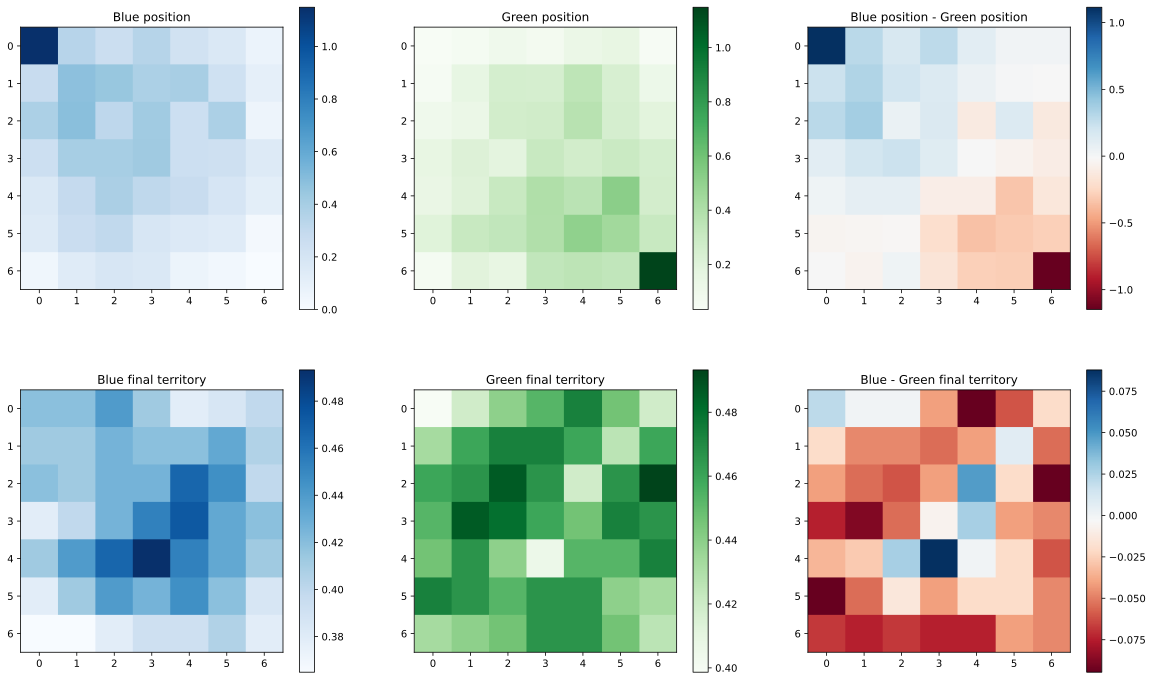

In [20]:
## plot heatmap
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'#输出矢量图设置
## subplot
plt.figure(figsize=(20,12))

plt.subplot(2, 3,  1)
plt.imshow(move_heatmap[0] / len(game_history), cmap="Blues")
plt.colorbar()
plt.title("Blue position")

plt.subplot(2, 3, 2)
plt.imshow(move_heatmap[1] / len(game_history), cmap="Greens")
plt.colorbar()
plt.title("Green position")


plt.subplot(2, 3, 3)
plt.imshow((move_heatmap[0] - move_heatmap[1]) / len(game_history), cmap="RdBu")
plt.title("Blue position - Green position")
plt.colorbar()

plt.subplot(2, 3, 4)

plt.imshow(terr_heatmap[0] / len(game_history), cmap="Blues")
plt.colorbar()
plt.title("Blue final territory")

plt.subplot(2, 3, 5)
plt.imshow(terr_heatmap[1] / len(game_history), cmap="Greens")
plt.colorbar()
plt.title("Green final territory")

plt.subplot(2, 3, 6)
plt.imshow((terr_heatmap[0] - terr_heatmap[1]) / len(game_history), cmap="RdBu")
plt.title("Blue - Green final territory")
plt.colorbar()

plt.savefig("./log/heatmap.png")
plt.show()

## save